# Efficient parameter tuning using GridSearchCV
Allows us to define a grid of parameters to optimize using cross validation, automates parameter optimization for us.

In [2]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

# Load iris dataset
iris = load_iris()

# Create x and y

x = iris.data
y = iris.target



# Steps for Grid Search

In [19]:
# 1. Define parameter values that should be searched.
k_range = list(range(1,31))
print(type(k_range))

<class 'list'>


In [20]:
# 2. Create a parameter grid {Mapping parameter names to the values to be searched}
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [23]:
# 3. Instantiate the model and the grid
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs = -1) ### n_jobs = -1 specifies to use all available processors.

In [24]:
# Fit the grid with data
grid.fit(x,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [26]:
grid.grid_scores_   ## gives out list of tuples for various parameter values.

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [31]:
## Examine the first tuple
grid.grid_scores_[0].parameters
grid.grid_scores_[0].cv_validation_scores
grid.grid_scores_[0].mean_validation_score

0.95999999999999996

In [35]:
# Creating a list of mean scores only
grid_mean_scores = [x.mean_validation_score for x in grid.grid_scores_]
print(grid_mean_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97999999999999998, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.95999999999999996, 0.96666666666666667, 0.95999999999999996, 0.96666666666666667, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


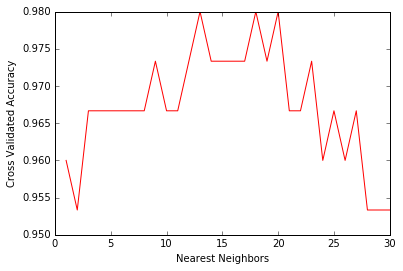

In [43]:
plt.plot(k_range, grid_mean_scores, "-r")
plt.xlabel('Nearest Neighbors')
plt.ylabel('Cross Validated Accuracy')

In [46]:
### Examining the best model
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

## grid search chose n_neighbors = 13 but it could also choose 18, 20 coz they gave same results. Grid search seems to choose
## the first best value. But for knn, more the k lesser complex the model and faster it is. 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')
{'n_neighbors': 13}
0.98


# Searching for multiple parameters simultaneously

In [49]:
## Define parameter values that should be searched
k_range = list(range(1,31))
weight_options = ['uniform', 'distance']
## In knn uniform means all the n neighbors are given equal weightage.
## In knn distance: closer neighbors are given more weightage.

# Creating param grid KEEP IN MIND IT'S  A DICTIONARY

param_grid = dict(n_neighbors=k_range, weights = weight_options)
print(param_grid)

{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [54]:
## Instantiate the grid
grid = GridSearchCV(knn, param_grid, cv =20, scoring='accuracy', n_jobs=-1)


In [55]:
##  Fit the grid
grid.fit(x,y)

GridSearchCV(cv=20, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [52]:
### Examining the best model
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')
{'weights': 'uniform', 'n_neighbors': 13}
0.98


## Predicting using the best parameters

In [60]:
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [61]:
knn.predict([3,5,4,2])

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [64]:
### Or we can let gridsearch automatically put the best parameters and predict
grid.predict([3,5,4,1])

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

# Reducing computational expense using RandomSearchCV
Searches only a subset of parameters to be optimized and allows us to control nof parameter combinations. 

In [65]:
from sklearn.grid_search import RandomizedSearchCV


In [67]:
# Specify param_dist instead of param_grid
param_dist = dict(n_neighbors= k_range, weights= weight_options)

### SPECIFY CONTINUOUS DISTRIBUTION FOR CONTINUOUS PARAMETERS AND RANGE FOR DISCRETE PARAMETERS.

In [71]:
rand = RandomizedSearchCV(knn, param_dist, cv =10, n_iter =25, scoring='accuracy', random_state=5 )
## n_iter = nof random combination of parameters to try

In [72]:
rand.fit(x,y)
rand.grid_scores_

[mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 18},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 24},
 mean: 0.98000, std: 0.03055, params: {'weights': 'uniform', 'n_neighbors': 20},
 mean: 0.95333, std: 0.04269, params: {'weights': 'uniform', 'n_neighbors': 28},
 mean: 0.97333, std: 0.03266, params: {'weights': 'uniform', 'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 5},
 mean: 0.97333, std: 0.03266, params: {'weights': 'uniform', 'n_neighbors': 19},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 20},
 mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 14},
 mean: 0.96667, std: 0.03333, params: {'weights': 'uniform', 'n_neighbors': 25},
 mean: 0.97333, std: 0.0326

In [74]:
print(rand.best_score_)
print(rand.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 20}


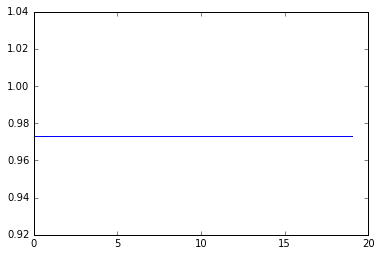

In [76]:
best_scores = []

for i in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv =10, n_iter =3, scoring='accuracy', random_state=5 )
    rand.fit(x,y)
    best_scores.append(rand.best_score_)

plt.plot(range(20), best_scores)
    

# Tips for using Randomized search CV

1. Start off with a small value of n_iter.  Time it. 
2. Increase the value of n_iter according to your max time allowed. 